<center><span style="color:blue; font-weight:bold;font-size:40px"> Prédiction du risque d’avoir un AVC avec le modèle de Random Forest</span></center>

<left><span style="color:black; font-weight:bold;font-size:15px"> SOGO Armel Emmanuel</span></left>

Selon l’Organisation Mondiale de la Santé (OMS) Chaque année, 15 millions de personnes font un accident vasculaire cérébral (AVC) : 5 millions d'entre elles meurent et 5 millions souffrent d'une incapacité permanente, ce qui représente un poids pour la famille et la communauté. La suspicion du diagnostic d'AVC repose en règle générale sur la clinique avec deux éléments clés à savoir un déficit neurologique focalisé et une apparition brutale. L'examen neurologique confirme le déficit, en précise la topographie et permet d'évoquer le territoire atteint. C’est dans le souci d’éviter les erreurs de diagnostiques, de reduire la charge de travail des cliniciens et de minimiser les les coût supportés par les patients que nous proposons un modèle de Machine Learning qui détectera le risque pour un patient donné d'avoir un AVC en fonction de certaines caractéristiques. \
L'objectif de notre recherche est donc de prédire le risque pour un patient donné d'avoir un AVC parmi les cas positif réel.

# Importation des library nécéssaires

In [5]:
# Importation des library nécéssaire
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score,roc_auc_score, balanced_accuracy_score

In [6]:
# Lecture de la Data base
df=pd.read_csv('stroke_data.csv')
df.head(10)


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


In [7]:
# Vérification de doublons
df.duplicated().sum()

0

# Définition des variables

# Définition des variables
* Sex: il s'agit du genre du patient (1: male; 0: female)
* age: Age du patient en année
* hypertension: le patient a déja eu de l'hypertension (1: Yes; 0: No)
* heart_disease: le patient a déjà eu une maladie cardiaque (1: Yes; 0: No)
* ever_married: Est-ce que le patient est marié (1: Yes; 0: No)
* work_type: Type de travail du patient: 0 - Never_worked, 1 - children, 2 - Govt_job, 3 - Self-employed, 4 - Private
* Residence_type: Zone de résidence du patient: 1 - Urban, 0 - Rural
* avg_glucose_level: Niveau de glycémie moyenne du patient.
* bmi: Indide de masse corporelle.
* smoking_status: Est-ce que le patient a déjà fumé:  1 - smokes, 0 - never smoked.
* Stroke: e=Est-ce que le patient a déjà eu un AVC: (1: Yes; 0: No)

# Exploration et Analyse des données

## Exploration et prétraitement des données

In [8]:
# Taille de notre jeu de données
df.shape

(40910, 11)

Notre base de donées est composée de 40910 lignes avec 11 variabes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


Un trois valeurs manquantes dans notre Data Base. Ces valeurs sont localisé dans la variavle sex car son N=40907 au lieu de 40910. Nous pouvons vérifié cela aisement comme en comptant les missing par variable:


In [10]:
df.isna().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df['sex'].value_counts()

sex
1.0    22710
0.0    18197
Name: count, dtype: int64

 Les hommes sont les plus nombreux. Nous allons donc remplacé les 3 missing par le code 1

In [12]:
df['sex'] = df['sex'].fillna(1)

In [13]:
# Vérification de missing à postériori
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Aucune variable manquante dans notre Data Frame \
Le sexe et l'âge sont en type float, nous allons convertir en int


In [14]:
df['sex'] = df['sex'].astype(int)
df['age'] = df['age'].astype(int)

Afin de pouvoir décrire et visualer les données, nous allons labélisé les modalitées de nos variables \
Pour ce faire, nous faire une copie de notre data frame sur laquelle nous allons décire et visualiser

### Définition des labelles

In [15]:
# Copie parfaite de notre Df sans modification du type des variables
df_cop=df.copy(deep=True)

In [16]:
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40910 non-null  int32  
 1   age                40910 non-null  int32  
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 3.1 MB


In [17]:

# Code de décodage
decoder_one_no = {1: 'Yes', 0: 'No'} # Pour les oui et non
decoder_sexe = {1: 'Male', 0: 'Female'} # pour le sexe
decoder_work_type = {0: 'Never worked', 1: 'Children', 2:'Govt job', 3: 'Self-employed', 4: 'Private' } # pour la variable work_type
decoder_Residence_type = {1: 'Rural', 0: 'Urban'} # pour le Residence_type
decoder_smoking_status = {1: 'Smokes', 0: 'Never smoked'} # pour le smoking_status

# Label define 
df_cop['sex'] = df_cop['sex'].replace(decoder_sexe)
df_cop['hypertension'] = df_cop['hypertension'].replace(decoder_one_no)
df_cop['heart_disease'] = df_cop['heart_disease'].replace(decoder_one_no)
df_cop['ever_married'] = df_cop['ever_married'].replace(decoder_one_no)
df_cop['stroke'] = df_cop['stroke'].replace(decoder_one_no)
df_cop['work_type'] = df_cop['work_type'].replace(decoder_work_type)
df_cop['Residence_type'] = df_cop['Residence_type'].replace(decoder_Residence_type)
df_cop['smoking_status'] = df_cop['smoking_status'].replace(decoder_smoking_status)

In [18]:
df_cop.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,63,No,Yes,Yes,Private,Rural,228.69,36.6,Smokes,Yes
1,Male,42,No,Yes,Yes,Private,Urban,105.92,32.5,Never smoked,Yes
2,Female,61,No,No,Yes,Private,Rural,171.23,34.4,Smokes,Yes
3,Male,41,Yes,No,Yes,Self-employed,Urban,174.12,24.0,Never smoked,Yes
4,Male,85,No,No,Yes,Private,Rural,186.21,29.0,Smokes,Yes


### Résumé statistique des variables numériques

In [19]:
# Résumé statistique des variables numériques
df_cop.describe()

,age,avg_glucose_level,bmi
count,40910.000000,40910.000000,40910.000000
mean,51.327255,122.075901,30.406355
std,21.623969,57.561531,6.835072
min,-9.000000,55.120000,11.500000
25%,35.000000,78.750000,25.900000
50%,52.000000,97.920000,29.400000
75%,68.000000,167.590000,34.100000
max,103.000000,271.740000,92.000000


L'âge minimal est -9 qui inférieur à 0. Ce n'est pas normale. Regardons le nombre de patient dont l'âge est inférieur à 0

In [20]:
df_cop[df_cop['age'] < 0].shape[0]
# Il y a 58 patients. Nous allons supprimé ces lignes dans les 2 bases


58

In [21]:
# Suppression des patient dont l'âge est inférieur à 0
df = df.drop(df[df['age'] < 0].index)
df_cop = df_cop.drop(df_cop[df_cop['age'] < 0].index)

In [22]:
#Comptons le nombre de valeurs unique dans chaque colonne de notre DataFrame
unique_values_count = df_cop.nunique()
print(unique_values_count)


sex                     2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    2903
bmi                   370
smoking_status          2
stroke                  2
dtype: int64


Les variables age, avg_glucose_level et bmi ont les plus grand cardinalité. Ces variables seront traité. Nous allons les normalisé

 ### Visualisons notre variable d'intérêt

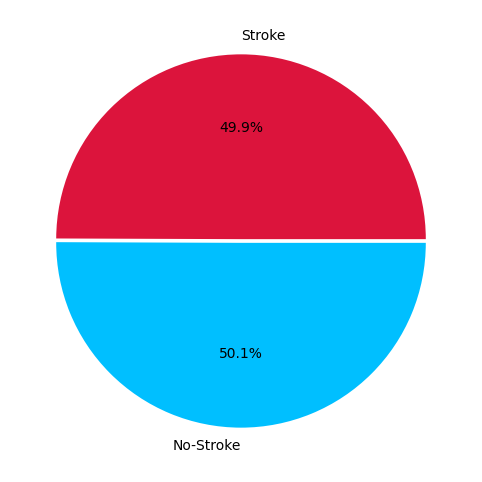

In [23]:
# visualisons notre variable d'intérêt
plt.figure(figsize=(8,6))
labels = ['Stroke', 'No-Stroke']
sizes = [df_cop['stroke'].value_counts()['Yes'],df_cop['stroke'].value_counts()['No']]
colors = ['crimson', 'deepskyblue']
explode = (0.01,0.01)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = df_cop);

Près de la moitié des patients ont eu un accident cardio vasculaire dans notre base de données

### Corrélation entre stroke et les autres variables explicatives

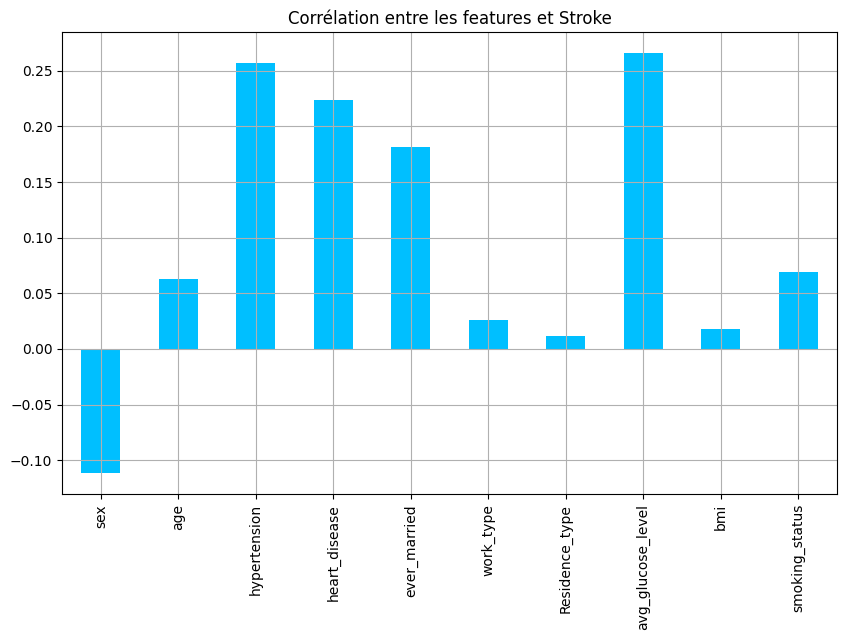

In [24]:
#Corrélation entre stroke et les autres variables explicatives
df.drop('stroke', axis=1).corrwith(df.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Corrélation entre les features et Stroke",color="deepskyblue");

Au régard de ce graphique nous pouvons dire que: les variables bmi, Residence_type, work_type sont les moins corrélées avec Storke. Le reste des autres variables ont une corrélation significative avec Storke.
Nous pouvons regarder l'infulence de chaque variable sur le risque d'AVC


### Influence des variables cathégorielles sur le risque d'avoir un AVC

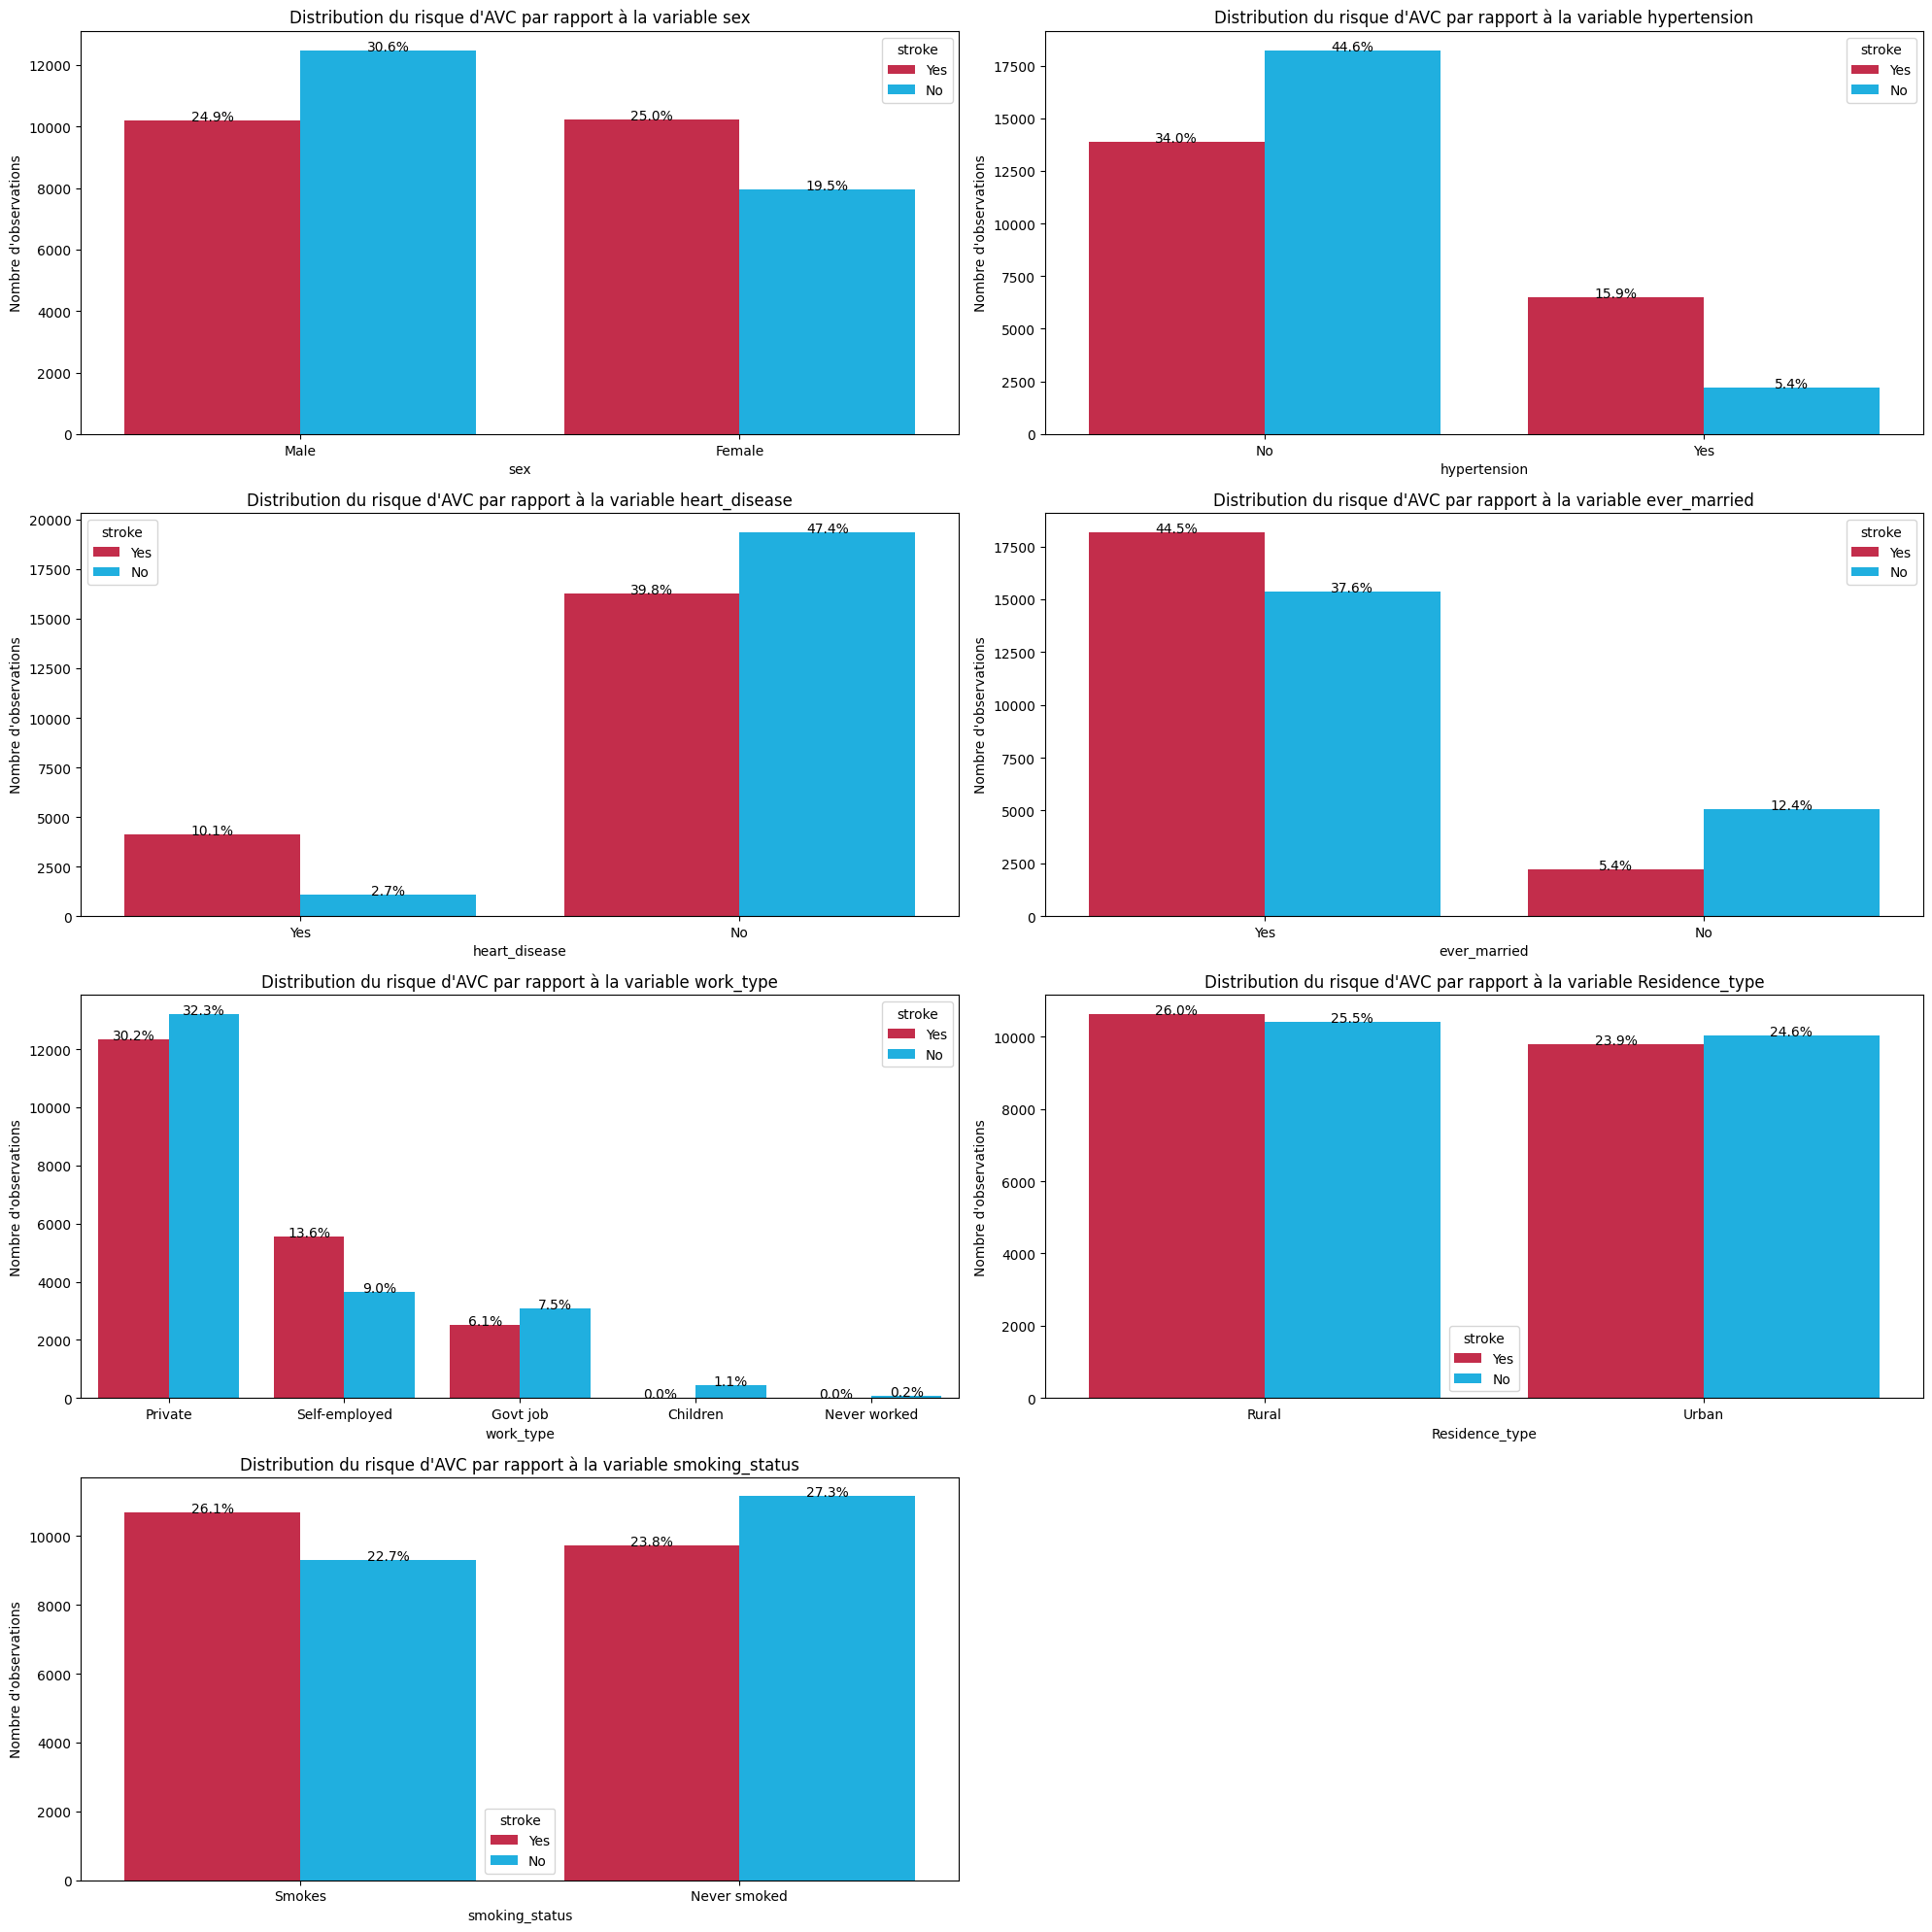

In [25]:

# Liste des variables catégoriques
var_cathe = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Calcul du nombre de rangées nécessaires pour afficher les sous-graphiques
num_rows = (len(var_cathe) + 1) // 2  # Division entière pour le nombre de rangées

# Création des sous-graphiques
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 5 * num_rows))

# Affichage des diagrammes à barres pour chaque variable catégorique
for i, col in enumerate(var_cathe):
    row = i // 2
    col = var_cathe[i]  # Utilisation du nom de la colonne
    ax = axes[row, i % 2]  # Sélection du sous-graphique

    sns.countplot(x=col, hue='stroke', data=df_cop, palette=['crimson','deepskyblue'], ax=ax)
    ax.set_title(f"Distribution du risque d'AVC par rapport à la variable {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Nombre d\'observations')

    # Ajout des proportions sur chaque barre
    total = len(df_cop)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.1%}', ha="center")

# Si le nombre de variables catégoriques est impair, supprimer le dernier sous-graphique vide
if len(var_cathe) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage des sous-graphiques
plt.show()


Au regard de ce qui précède, nous pouvons retenir que:
* les variables hypertension,heart_disease et smoking_status sont celles qui augmentent le risque d'avoir un AVC.
* le type d'emploi personnel (sel-employed) augment le risque d'avoir un AVC comparé aux autres type d'emploi
* De plus, les emploie ecomme "children" et "Never worked" ont des proportions très faibles. Nous n'allons pas considéré ces modalité car peuvent causé des biais.

In [26]:
df.drop(df[df.work_type <= 1].index, inplace=True)

### Influence des variables quantitative sur le risque d'avoir un AVC

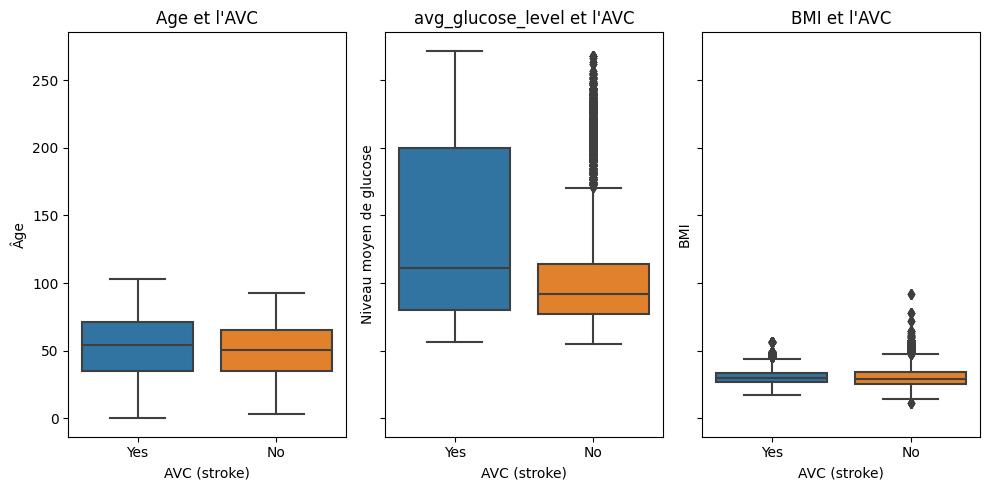

In [27]:
#  Créer une grille de sous-tracés pour placer les trois box plots côte à côte
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# Tracer le box plot pour l'âge
sns.boxplot(x='stroke', y='age', data=df_cop, ax=axes[0])
axes[0].set_title('Age et l\'AVC')
axes[0].set_xlabel('AVC (stroke)')
axes[0].set_ylabel('Âge')

# Tracer le box plot pour le niveau moyen de glucose
sns.boxplot(x='stroke', y='avg_glucose_level', data=df_cop, ax=axes[1])
axes[1].set_title('avg_glucose_level et l\'AVC')
axes[1].set_xlabel('AVC (stroke)')
axes[1].set_ylabel('Niveau moyen de glucose')

# Tracer le box plot pour l'indice de masse corporelle (BMI)
sns.boxplot(x='stroke', y='bmi', data=df_cop, ax=axes[2])
axes[2].set_title('BMI et l\'AVC')
axes[2].set_xlabel('AVC (stroke)')
axes[2].set_ylabel('BMI')

# Afficher les graphiques
plt.tight_layout()
plt.show()

En comparent les médiames, les graphiques ci-dessous nous montre clairement que ces trois variables influence le risque d'avoir un AVC

## Normalisation de variable

### Vérification de l'asymétrie de ces variables

In [28]:
# Vérification de l'asymétrie de ces variables

# Calcul de la skewness des variables
skewness_age = df['age'].skew()
skewness_glucose = df['avg_glucose_level'].skew()
skewness_bmi = df['bmi'].skew()

# Affichage des résultats
print("Skewness de l'âge:", skewness_age)
print("Skewness de la glycémie moyenne:", skewness_glucose)
print("Skewness de l'IMC:", skewness_bmi)



Skewness de l'âge: -0.06761747828589149
Skewness de la glycémie moyenne: 0.9356721187360546
Skewness de l'IMC: 1.1001300593722434


La glycémie moyenne (avg_glucose_level) et l'IMc (bmi) sont les deux variables dont le coefficient skewness est éloigné de 0. La distribution est étalé à droite. Ces variables  par conséquent présente une asymétrie importante. Nous pouvons visionné cela sur un graphique

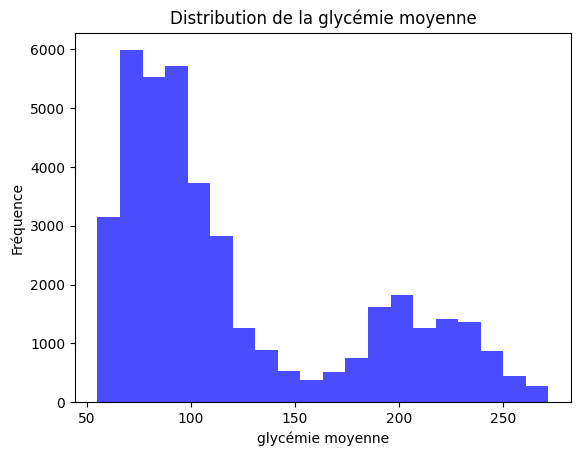

In [29]:

plt.hist(df['avg_glucose_level'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution de la glycémie moyenne')
plt.xlabel('glycémie moyenne')
plt.ylabel('Fréquence')
plt.show()


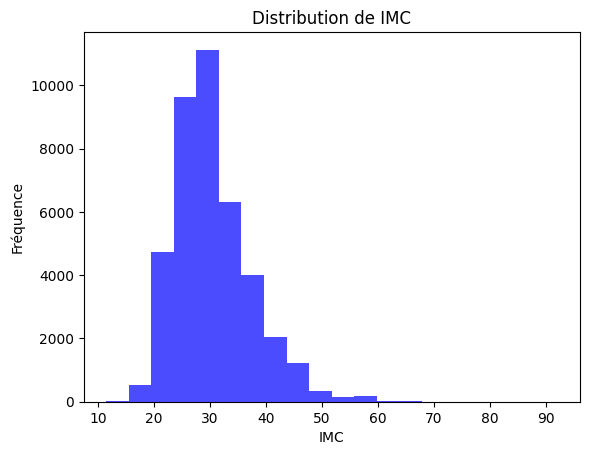

In [30]:
plt.hist(df['bmi'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution de IMC')
plt.xlabel('IMC')
plt.ylabel('Fréquence')
plt.show()

Nous allons corrigé l'asymétrie de ces 2 variables par la méthode logarithmique car la distribution est étendu vers la droite.

In [31]:
# Application de la transformation logarithmique à la variable "avg_glucose_level"
df['avg_glucose_level'] = np.log(df['avg_glucose_level'])

# Application de la transformation logarithmique à la variable "bmi"
df['bmi'] = np.log(df['bmi'])


### Normalisation des variables quantitative
Nous allons utilisé la méthode: Standardisation (Z-score scaling) au vu de la distribution de nos données

In [32]:
# Créer un objet StandardScaler
scaler = StandardScaler()
# Normaliser les variables
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [33]:
(df[['bmi','age','avg_glucose_level']]).describe()

,bmi,age,avg_glucose_level
count,4.033600e+04,4.033600e+04,4.033600e+04
mean,6.553002e-17,1.409248e-17,5.580621e-16
std,1.000012e+00,1.000012e+00,1.000012e+00
min,-4.470487e+00,-2.384894e+00,-1.607528e+00
25%,-6.213584e-01,-7.615501e-01,-7.858028e-01
50%,-4.625889e-02,2.693116e-02,-2.815159e-01
75%,6.342854e-01,7.690312e-01,1.003442e+00
max,5.295438e+00,2.392375e+00,2.067272e+00


# Construction du modèle

In [34]:
### Diviser les caractéristiques et la cible
X = df.drop(columns=['stroke'])
y = df['stroke']

In [35]:
# Convertir les variables catégorielles en variables binaires (one-hot encoding)
X_encoded = pd.get_dummies(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


Choix du modèle, entrainement du modèle:
Nous allons utilisé le modèle de random forest pour prédire la probabilité d'avoir un AVC

In [36]:
# Créer une instance de RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
# Entraîner le modèle
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Evaluation du modèle

In [39]:
# Calcul de l'exactitude des prédictions
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle Random Forest :", accuracy)

Exactitude du modèle Random Forest : 0.9961986612676639


Nore modèle de prédiction d'AVC est capable de classer correctement à 99,6% les  cas d'AVC. 

In [40]:
# Matrice de confusion
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Matrice de confusion pour Random Forest :\n", confusion_matrix_rf)

Matrice de confusion pour Random Forest :
 [[5967   46]
 [   0 6088]]


In [41]:
#compute metrics for evaluation

def model_evalu(y_test):     
    
   
   # moyenne harmonique de la précision et du rappel.
    f1 = f1_score(y_test, y_pred)
    
     # Taux de précision des positif parmis les prédictions positives
    precision = precision_score(y_test, y_pred)

    # Taux de vrai positif
    recall = recall_score(y_test, y_pred)
    
    # mesure de la précision équilibré de la performance du modèle
    preci_equi = balanced_accuracy_score(y_test, y_pred)

    # Evaluation de la capacité du modèle à discriminer entre les classes positives et négatives
    auc_roc = roc_auc_score(y_test, y_pred)

    #Visualisation du résultat
    model_eval_df = pd.DataFrame([[accuracy, f1, precision, recall, preci_equi, auc_roc]], columns=['accuracy', 'f1_score', 'precision', 'Recall', 'balanced_accuracy', 'auc_roc'])
    return model_eval_df

In [42]:
resultat = model_evalu(y_test)
resultat.index = ['Methode de Random Forest']
resultat.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))



,accuracy,f1_score,precision,Recall,balanced_accuracy,auc_roc
Methode de Random Forest,0.996199,0.996236,0.992501,1.000000,0.996175,0.996175


Notre modèl permet de prédire parfaitement (Recall=100%) sur les cas positifs réel le risque pour un patient donné d'avoir un AVC 

In [43]:
# Sauvegarde du modèl
from joblib import dump

# Sauvegarder le modèle
dump(rf_model, 'modele.joblib')

['modele.joblib']